In [87]:
import numpy as np
from sknetwork.clustering import Louvain, get_modularity
from sklearn.cluster import KMeans
from sknetwork.embedding import GSVD
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
from sknetwork.visualization import svg_graph, svg_bigraph
import geopandas as gpd
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [88]:
adj = np.loadtxt("GCC-part/adjacency_matrix.txt", comments="#", delimiter=" ", unpack=False)

In [89]:
adj

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [90]:
louvain = Louvain(n_aggregations=10)
labels = louvain.fit_transform(adj)

In [91]:
labels_unique, counts = np.unique(labels, return_counts=True)
print(labels_unique, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] [124 114 108  92  91  87  78  77  76  76  61  58  56  48  48  36  34  34
  33  24  18  17]


In [92]:
len(labels)

1390

In [93]:
get_modularity(adj, labels)

0.8715686934329964

In [94]:
geo = gpd.read_file("joined_data/WIct.shp")

In [95]:
simple = geo[["ct","geometry"]].copy()

In [96]:
simple

,ct,geometry
0,55001950100,"POLYGON ((-89.92702 44.19367, -89.92679 44.194..."
1,55001950201,"POLYGON ((-90.01877 44.04772, -90.01870 44.048..."
2,55001950202,"POLYGON ((-90.02638 44.08721, -90.02627 44.089..."
3,55001950400,"POLYGON ((-89.93773 43.96629, -89.93738 43.966..."
4,55001950501,"POLYGON ((-89.98419 43.91181, -89.98397 43.913..."
...,...,...
1385,55141011300,"POLYGON ((-89.85937 44.36194, -89.85928 44.362..."
1386,55141011400,"POLYGON ((-89.81719 44.38606, -89.81718 44.386..."
1387,55141011500,"POLYGON ((-89.80564 44.34373, -89.80245 44.347..."
1388,55141011600,"POLYGON ((-89.91256 44.27344, -89.91253 44.273..."


In [97]:
simple["labels"] = labels

<AxesSubplot:>

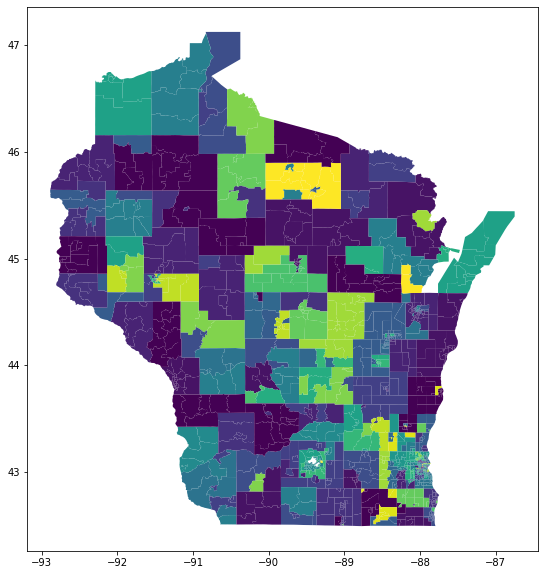

In [98]:
simple.plot(column="labels",figsize=(10,10))

In [99]:
df = pd.read_csv("joined_data/joined_data_CHR_simplified.csv")

In [100]:
sub = df[['poverty_score',"age", 'median_age_no_insurance', 'hispanic_prop',
       'MFratio', 'household_median_income', 'white', 'black', 'native',
       'asian', 'hawaiian', 'Bachelor', 'Master', 'Doctorate', 'pop']]

In [101]:
attr = np.array(sub)

In [102]:
sc = StandardScaler()
attr_norm = sc.fit_transform(attr)

In [103]:
attr

array([[5.43144000e+03, 5.38003407e+01, 3.75000000e+01, ...,
        1.46000000e+02, 2.40000000e+01, 2.93500000e+03],
       [2.30987000e+03, 4.96128071e+01, 3.63829787e+01, ...,
        3.00000000e+01, 0.00000000e+00, 1.34300000e+03],
       [4.33765000e+03, 5.22477722e+01, 3.99230769e+01, ...,
        5.80000000e+01, 3.00000000e+00, 2.58100000e+03],
       ...,
       [1.11261100e+04, 4.19909138e+01, 3.03876404e+01, ...,
        3.24000000e+02, 6.40000000e+01, 5.83300000e+03],
       [8.85504000e+03, 4.45145775e+01, 4.12140411e+01, ...,
        1.60000000e+02, 0.00000000e+00, 5.04200000e+03],
       [7.24562000e+03, 4.13000888e+01, 3.16646778e+01, ...,
        1.75000000e+02, 1.20000000e+01, 4.50200000e+03]])

In [104]:
silhouette_score(attr_norm, labels)

-0.13596614264665455

In [112]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(attr_norm)
kmeans.labels_

array([0, 0, 0, ..., 4, 0, 1], dtype=int32)

In [113]:
unique_labels, counts = np.unique(kmeans.labels_, return_counts=True)
print(unique_labels, counts)

[0 1 2 3 4 5 6 7 8] [352 375  21 105 301   8  43  51 134]


In [114]:
get_modularity(adj, kmeans.labels_)

0.22882203375604032

In [115]:
simple["labels"] = kmeans.labels_

<AxesSubplot:>

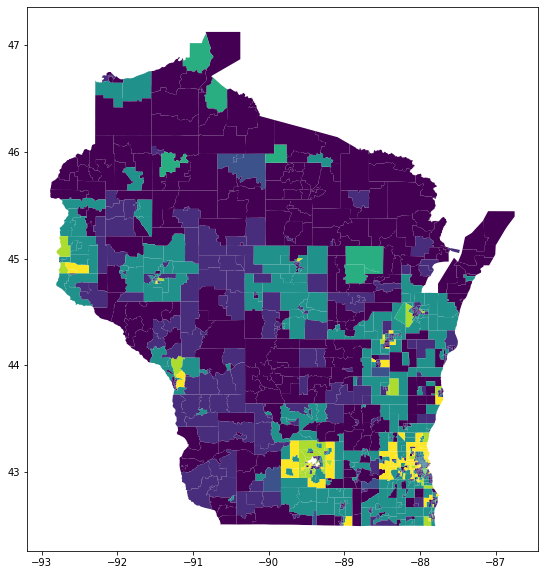

In [116]:
simple.plot(column="labels",figsize=(10,10))

In [117]:
silhouette_score(attr_norm, kmeans.labels_)

0.16866620789988962

In [111]:
np.savetxt("Louvain_cluster.txt", labels, delimiter=" ")

In [118]:
np.savetxt("KMeans_cluster.txt", kmeans.labels_, delimiter=" ")